# Embedded Ethics student feedback

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plot_likert
from scipy import stats
import os
import sys

project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
sys.path.append(project_root)

from scripts import utils

plot_likert.__internal__.BAR_LABEL_FORMAT = "%.1f" # plotting shows % with 2 decimals


In [51]:
# Vars
courses_cg = ["COMP202", "COMP250"]
courses_ee = ["COMP251", "COMP424", "COMP551"]
courses = courses_cg + courses_ee


deg_type = ["Undergraduate", "Graduate"]
years = ["U0", "U1", "U2", "U3", "U4+", "M1", "M2", "M3+", "PhD1", "PhD2", "PhD3", "PhD4", "PhD5+"]
majors = ["CS/SWE major", "CS/SWE minor", "Other"]
genders = ["Man", "Woman", "Other", "Prefer not to answer"]
minorities = ["Yes", "No", "Prefer not to answer"]
age = ["<18", "18-24", "25-34", "35-44", ">45", "Prefer not to answer"]
ethics_knowledge = ["Yes", "No"]
likert = range(1, 8)
likert_values = ["Strongly Disagree", "Disagree", "Somewhat Disagree", "Neutral", "Somewhat Agree", "Agree", "Strongly Agree"]

# current semester (for script purposes)
semester = "F2025"

In [52]:
data_dir = os.path.join(project_root, 'data')

ee_file = "F2025_ee_clean.csv"
cg_file = "F2025_cg_clean.csv"

ee_data_path = os.path.join(data_dir, 'clean', ee_file)
cg_data_path = os.path.join(data_dir, 'clean', cg_file)

In [53]:
ee_data_full = pd.read_csv(ee_data_path, header=[0,1], index_col=0)
cg_data = pd.read_csv(cg_data_path, header=[0,1], index_col=0)
data_all = [ee_data_full, cg_data]

# rebuild the multiindexing properly to make data access easier
for d in data_all:
    utils.rebuild_multiindex(d)

In [54]:
# remove rows with students who did not attend EE
ee_data = ee_data_full[ee_data_full["EE course"]["None"] == 0]

Separate out the data per course

In [55]:
course_data = {}
for course in courses:
    if course in courses_ee:
        course_data[course] = ee_data[ee_data["EE course"][course] == 1]

        # TODO: test this
        if course in cg_data["EE course"].columns:
            course_data[course] = pd.concat([course_data[course], cg_data[cg_data["EE course"][course] == 1]])
    else:
        course_data[course] = cg_data[cg_data["CG course"][course] == 1]
        
course_data["None"] = ee_data_full[ee_data_full["EE course"]["None"] == 1]

## Likert-scale feedback

c:\Users\Etomiuk\OneDrive\OneNote\EE_data_analysis\analysis-embedded-ethics\venv\Lib\site-packages\plot_likert\plot_likert.py:257: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df.applymap(validate)
c:\Users\Etomiuk\OneDrive\OneNote\EE_data_analysis\analysis-embedded-ethics\venv\Lib\site-packages\plot_likert\plot_likert.py:310: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  responses_to_first_question = responses_per_question[0]


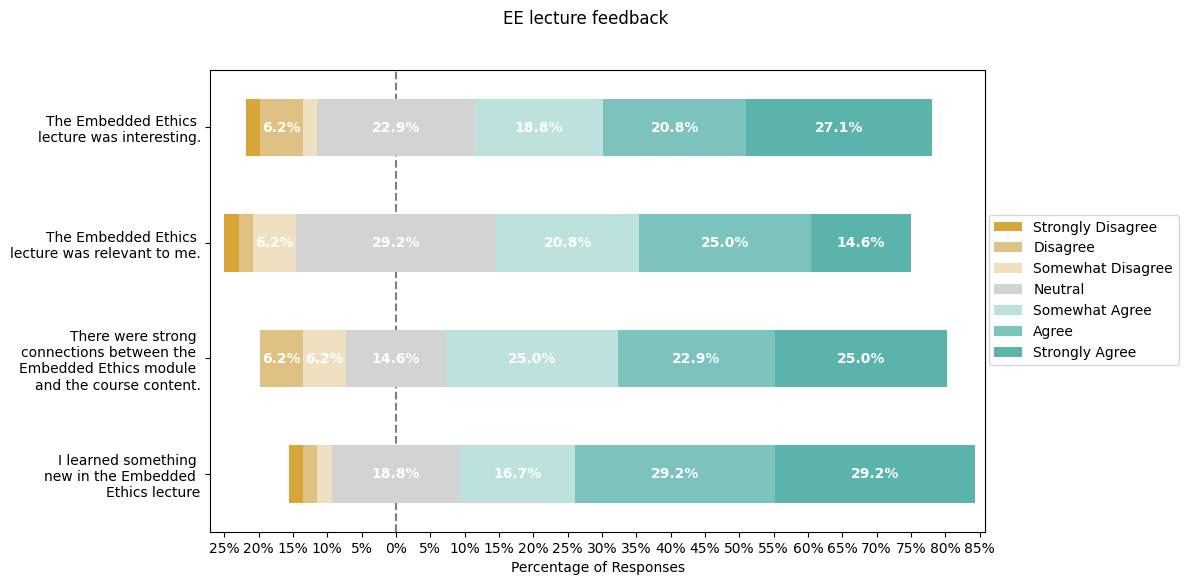

In [56]:
fig, ax = plt.subplots(figsize=(10, 6)) # draw two plots in one row, two columns

plot_likert.plot_likert(ee_data["Lecture feedback"], likert, colors=plot_likert.colors.likert7, plot_percentage=True, bar_labels=True, legend=False, ax=ax)

fig.suptitle("EE lecture feedback")
ax.set_yticklabels(["The Embedded Ethics \nlecture was interesting.",
                     "The Embedded Ethics \nlecture was relevant to me.",
                     "There were strong \nconnections between the \nEmbedded Ethics module \nand the course content.",
                     "I learned something \nnew in the Embedded \nEthics lecture"][::-1])
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, likert_values, bbox_to_anchor=(1.1, 0.65))

Average lecture feedback score

In [57]:
feedback_avg = []
feedback_std = []
for col in ee_data["Lecture feedback"]:
    feedback_avg.append(ee_data["Lecture feedback"][col].mean())
    feedback_std.append(ee_data["Lecture feedback"][col].std())

In [58]:
pd.DataFrame({"Average": feedback_avg, "StdDev": feedback_std}, index=["Q1 (Interest)", "Q2 (Relevance)", "Q3 (Connection)", "Q4 (Learning)"])

,Average,StdDev
Q1 (Interest),5.208333,1.583940
Q2 (Relevance),4.979167,1.391304
Q3 (Connection),5.270833,1.469398
Q4 (Learning),5.500000,1.429179


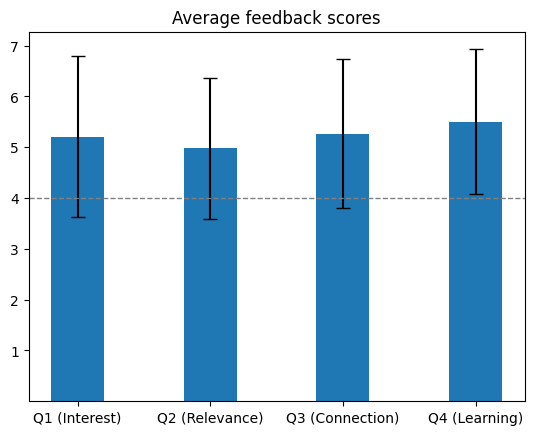

In [59]:
bar_width = 0.4
x_labels = ["Q1 (Interest)", "Q2 (Relevance)", "Q3 (Connection)", "Q4 (Learning)"]

fig = plt.subplots()
plt.bar(x_labels, feedback_avg, yerr=feedback_std, capsize=5, width=bar_width)
plt.axhline(y=4, linewidth=1, linestyle='dashed', color='grey')

plt.yticks(range(1, 8))
plt.title('Average feedback scores')
plt.show()


### Likert scale feedback per course
TODO: account for students enrolled in multiple EE courses

c:\Users\Etomiuk\OneDrive\OneNote\EE_data_analysis\analysis-embedded-ethics\venv\Lib\site-packages\plot_likert\plot_likert.py:257: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df.applymap(validate)
c:\Users\Etomiuk\OneDrive\OneNote\EE_data_analysis\analysis-embedded-ethics\venv\Lib\site-packages\plot_likert\plot_likert.py:310: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  responses_to_first_question = responses_per_question[0]
c:\Users\Etomiuk\OneDrive\OneNote\EE_data_analysis\analysis-embedded-ethics\venv\Lib\site-packages\plot_likert\plot_likert.py:257: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df.applymap(validate)
c:\Users\Etomiuk\OneDrive\OneNote\EE_data_analysis\analysis-embedded-ethics\venv\Lib\site-packages\plot_l

[Text(0, 0, 'I learned something \nnew in the Embedded \nEthics lecture'),
 Text(0, 1, 'There were strong \nconnections between the \nEmbedded Ethics module \nand the course content.'),
 Text(0, 2, 'The Embedded Ethics \nlecture was relevant to me.'),
 Text(0, 3, 'The Embedded Ethics \nlecture was interesting.')]

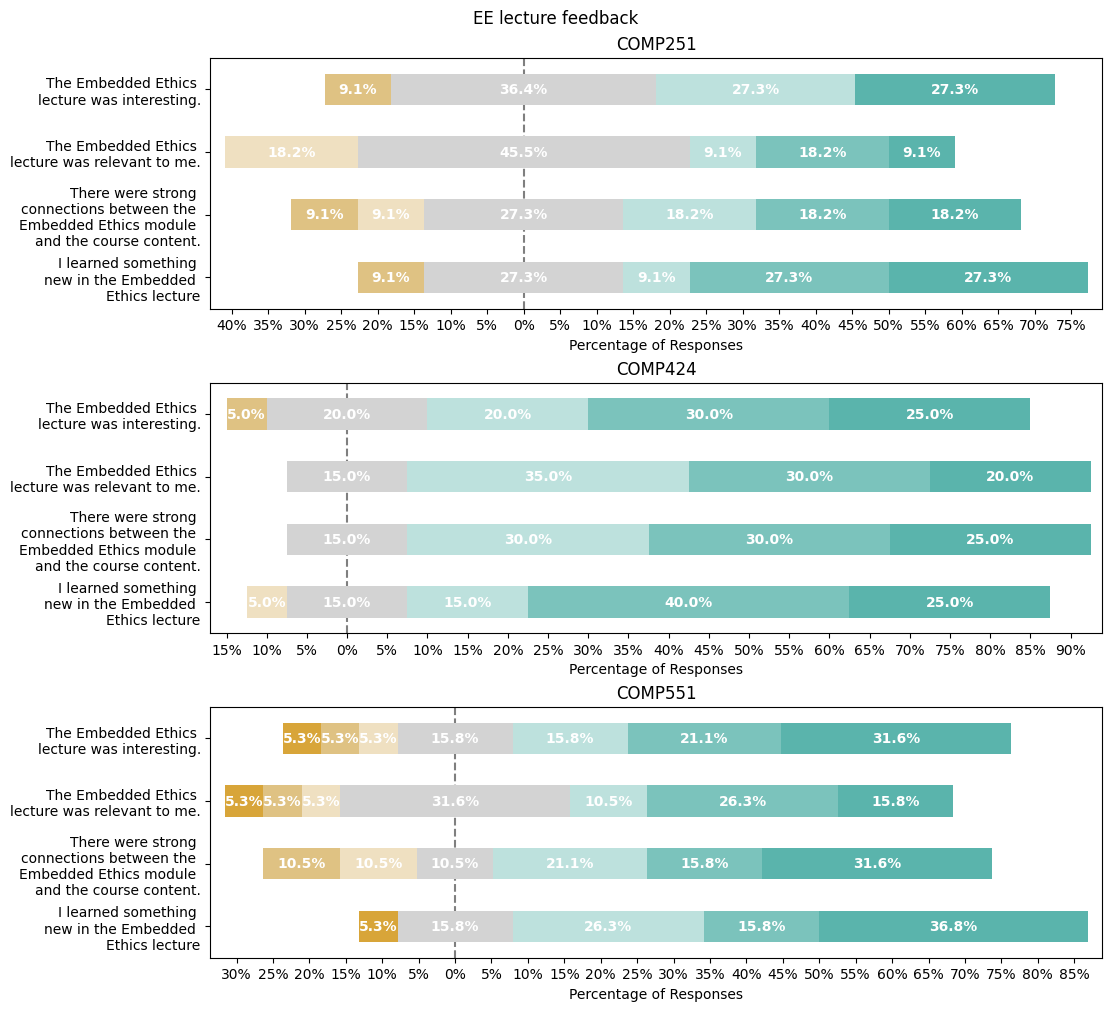

In [60]:
fig, axes = plt.subplots(3, 1, figsize=(11, 10), constrained_layout=True, sharey=True) # draw two plots in one row, two columns

for i, course in enumerate(courses_ee):
    plot_likert.plot_likert(course_data[course]["Lecture feedback"], likert, colors=plot_likert.colors.likert7, plot_percentage=True, bar_labels=True, legend=False, ax=axes[i])
    axes[i].set_title(course)

fig.suptitle("EE lecture feedback")
axes[0].set_yticklabels(["The Embedded Ethics \nlecture was interesting.",
                    "The Embedded Ethics \nlecture was relevant to me.",
                    "There were strong \nconnections between the \nEmbedded Ethics module \nand the course content.",
                    "I learned something \nnew in the Embedded \nEthics lecture"][::-1])
#handles, labels = axes[0].get_legend_handles_labels()
#fig.legend(handles, likert_values, loc="lower right")

Test of significance for differences between each course for each question.

In [ ]:
for col in ee_data["Lecture feedback"]:
    f_stat, p_stat = stats.f_oneway(course_data["COMP251"]["Lecture feedback"][col],
                                   course_data["COMP424"]["Lecture feedback"][col],
                                   course_data["COMP551"]["Lecture feedback"][col], 
                                   equal_var=False)
    print(f"ANOVA for {col}: f-statistic = {f_stat}, p-value = {p_stat}")

ANOVA for Q1: f-statistic = 0.4619435609218077, p-value = 0.6352022464135226
ANOVA for Q2: f-statistic = 3.1159204558841975, p-value = 0.06217784462356185
ANOVA for Q3: f-statistic = 1.4405929317443946, p-value = 0.2569931341887782
ANOVA for Q4: f-statistic = 0.2288297837692232, p-value = 0.7971485431828595


In [33]:
feedback_avg_course = {}
feedback_std_course = {}
for course in courses_ee:
    feedback_avg_course[course] = []
    feedback_std_course[course] = []
    for col in ee_data["Lecture feedback"]:
        feedback_avg_course[course].append(course_data[course]["Lecture feedback"][col].mean())
        feedback_std_course[course].append(course_data[course]["Lecture feedback"][col].std())

In [34]:
for course in courses_ee:
    print(f"Feedback average and stdev for {course}")
    print(pd.DataFrame({"Average": feedback_avg_course[course], "StdDev": feedback_std_course[course]}, index=["Q1 (Interest)", "Q2 (Relevance)", "Q3 (Connection)", "Q4 (Learning)"]))

Feedback average and stdev for COMP251
                  Average    StdDev
Q1 (Interest)    4.909091  1.578261
Q2 (Relevance)   4.545455  1.293340
Q3 (Connection)  4.818182  1.601136
Q4 (Learning)    5.272727  1.618080
Feedback average and stdev for COMP424
                 Average    StdDev
Q1 (Interest)       5.45  1.356272
Q2 (Relevance)      5.55  0.998683
Q3 (Connection)     5.65  1.039990
Q4 (Learning)       5.65  1.182103
Feedback average and stdev for COMP551
                  Average    StdDev
Q1 (Interest)    5.210526  1.812884
Q2 (Relevance)   4.789474  1.685854
Q3 (Connection)  5.157895  1.740471
Q4 (Learning)    5.526316  1.576509


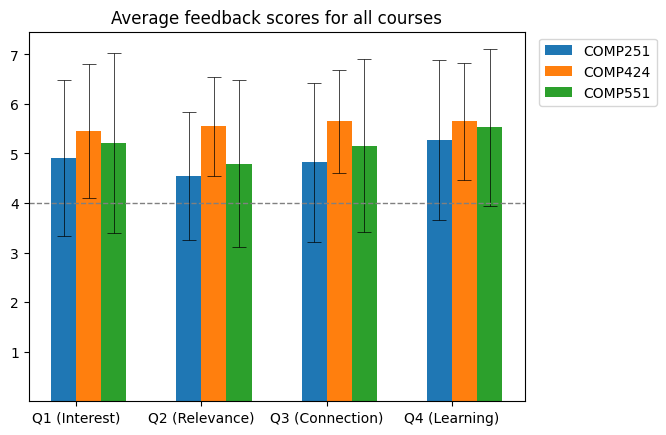

In [ ]:
bar_width = 0.2
x_labels = ["Q1 (Interest)", "Q2 (Relevance)", "Q3 (Connection)", "Q4 (Learning)"]
fig = plt.subplots()

for i, course in enumerate(courses_ee):
    coords = [x + i*bar_width for x in range(len(x_labels))]
    plt.bar(coords, feedback_avg_course[course], width=bar_width, label=course, yerr=feedback_std_course[course], capsize=5, 
            error_kw={'elinewidth':0.5, 'capthick':0.5})

plt.axhline(y=4, linewidth=1, linestyle='dashed', color='grey')
plt.yticks(range(1, 8))
plt.xticks(np.arange(len(x_labels)) + bar_width/2, x_labels)
plt.title('Average feedback scores for all courses')
plt.legend(loc='upper right', bbox_to_anchor=(1.28, 1))
plt.show()

## Written feedback
### Suggested topics

In [ ]:
# save feedback in a file
ee_topic_feedback = list(ee_data["EE topic feedback"][~ee_data["EE topic feedback"].isna()])
f = open(os.path.join(project_root, 'results', f'{semester}_ee_topic_feedback.txt'), 'w')
for comment in ee_topic_feedback:
    f.write(comment + "\n\n")
f.close()

#### Create a wordcloud
This will help visually see whether we have common topics

In [ ]:
from wordcloud import STOPWORDS, WordCloud

In [ ]:
text_topic = ""
for comment in ee_topic_feedback:
    words = comment.split()
    filtered_words = [word for word in words if word.lower() not in STOPWORDS]
    text_topic += " ".join(filtered_words)  

# Instantiate and generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=50, contour_color='steelblue').generate(text_topic)

# Display the generated word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### Lecture feedback

In [ ]:
# save feedback in a file
ee_lecture_feedback = list(ee_data["EE lecture feedback"][~ee_data["EE lecture feedback"].isna()])
f = open(os.path.join(project_root, 'results', f'{semester}_ee_lecture_feedback.txt'), 'w')
for comment in ee_lecture_feedback:
    f.write(comment + "\n\n")
f.close()

#### Create a wordcloud
This will help visually see whether we have common topics

In [ ]:
text_lecture_feedback = ""
for comment in ee_lecture_feedback:
    words = comment.split()
    filtered_words = [word for word in words if word.lower() not in STOPWORDS]
    text_lecture_feedback += " ".join(filtered_words)
    
# Instantiate and generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=50, contour_color='steelblue').generate(text_lecture_feedback)

# Display the generated word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## Ethics attitudes comments

In [ ]:
# save feedback in a file
ee_lecture_feedback = list(ee_data["Attitudes feedback"][~ee_data["Attitudes feedback"].isna()])
f = open(os.path.join(project_root, 'results', f'{semester}_attitudes_feedback_ee.txt'), 'w')
for comment in ee_lecture_feedback:
    f.write(comment + "\n\n")
f.close()

In [ ]:
# save feedback in a file
cg_lecture_feedback = list(cg_data["Attitudes feedback"][~cg_data["Attitudes feedback"].isna()])
f = open(os.path.join(project_root, 'results', f'{semester}_attitudes_feedback_cg.txt'), 'w')
for comment in cg_lecture_feedback:
    f.write(comment + "\n\n")
f.close()